In [565]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
%matplotlib inline

#### Simple Linear Regression

###### Stroing the tarin data and test data train_x , train_y values are to train(feed in another example) the data to the alogrithm
###### based on the train data we test our test data whether the predcted values are reached the accuray or not 

In [566]:
train=pd.read_csv('linear train.csv')
test=pd.read_csv('linear test.csv')
train.dropna(inplace=True)#train['y'].mean(),inplace=True)
train_x=train['x']
train_y=train['y']
test_x=test['x']
test_y=test['y']
x_train=np.array(train_x)
y_train=np.array(train_y)
x_test=np.array(test_x)
y_test=np.array(test_y)
x_train=x_train.reshape(-1,1)
x_test=x_test.reshape(-1,1)


In [567]:
train.isnull().sum()

x    0
y    0
dtype: int64

In [568]:
test.isnull().sum()

x    0
y    0
dtype: int64

####   how the actual test data is realted to varialble x and y which means test_x,test_y you can see a scatter plot below


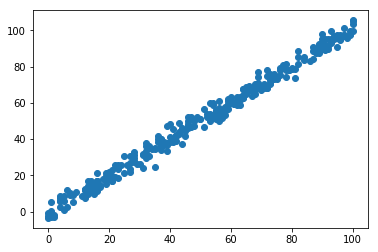

In [569]:
plt.scatter(test_x,test_y)

##### In above steps we have store data into train_x,train_y,test_x,test_y

##### In below steps we train our algorthm,test the data, predicting the accuracy, and plot a predicted y_test data and y_predicted

In [570]:
from sklearn.metrics import r2_score
reg=LinearRegression(normalize=True)
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [571]:
y_predict=reg.predict(x_test)
print(r2_score(y_test,y_predict))

0.9888014444327563


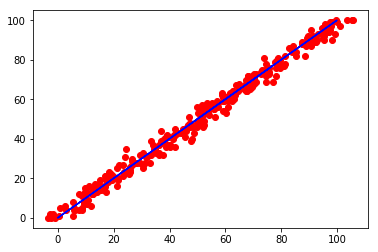

In [572]:
plt.scatter(y_test,y_predict,c='r')
plt.plot(reg.predict(x_test), y_predict, c = 'b')

In [573]:
reg.intercept_

-0.1072654643009372

#### Linear regression from Scratch

In [574]:
train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [575]:
train.insert(0,"Ones",1)
train.head()

,Ones,x,y
0,1,24.0,21.549452
1,1,50.0,47.464463
2,1,15.0,17.218656
3,1,38.0,36.586398
4,1,87.0,87.288984


In [576]:
x=train.iloc[:,:-1]
y=train.iloc[:,-1]
X=np.matrix(x.values)
Y=np.matrix(y.values)
Y=Y.reshape(699,1)

#### First we are assning parameters all parameters as 0 and from 0 to we use CostFunction and Gradient Descent to find the best values for the parameters

In [577]:
theta=np.matrix(np.array([0,0]))

#### CostFunction helps to find best parameters

In [578]:
def CostFunction(X,Y,theta):
    inner=np.power(((X*theta.T)-Y),2)
    sumofinner=np.sum(inner)
    return sumofinner/2*len(X)

#### Gradient Descent Minimize the cost function

In [579]:
def GradientDescent(X,Y,theta,alpha,iters):
    
    temp=np.matrix(np.zeros(theta.shape))
    parameter=int(theta.shape[1])
    cost=np.zeros(iters)
    for i in range(iters):
        error=((X*theta.T)-Y)
        for j in range(parameter):
            term=np.multiply(error,X[:,j])
            temp[0,j]=temp[0,j]-((alpha/len(X))*np.sum(term))
        theta=temp
        cost[i]=CostFunction(X,Y,theta)
    return theta,cost
        
        
            

#### aplha is used here because after every iteration(iters) we need to take steps down to minimize cost function.
#### best values for aplha 0.003,0.005,0.0003,0.01,0.001, we can take randomly but we need to change the aplha value based on our data and we can choose iteration till we find best values for parameters

In [580]:
alpha=0.0003
iters=1000

###### below line execute the best values for theta and we find the cost function (less costfunction then our parameters are good and we need to take care about underfitting or overfitting)

In [581]:
theta,cost=GradientDescent(X,Y,theta,alpha,iters)

In [582]:
theta

matrix([[0.00610821, 0.99895785]])

In [583]:
CostFunction(X,Y,theta)

1922883.3293258045

In [584]:
y_pred=theta[0,0]+(theta[0,1]*test["x"])

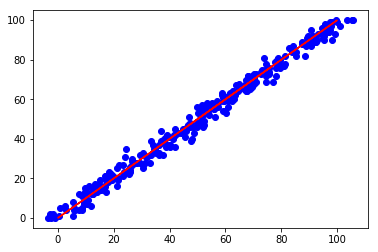

In [585]:
plt.scatter(test["y"],y_pred,c="b")
plt.plot(test["x"],y_pred,c="r")

#### Predicted Score of our model 

In [586]:
r2_score(test["y"],y_pred)

0.9887749632489007

##### How the Cost Function is decreasing you can see through visualization

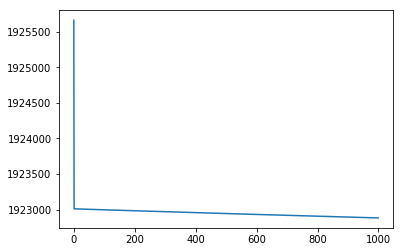

In [587]:
plt.plot(np.arange(iters),cost)